**Course: BA820 - Unsupervised and Unstructured ML**

**Notebook created by: Mohannad Elhamod**

**Note**: You are **ALLOWED** to use Generative AI for this notebook, but you must properly cite your usage. Be sure to review the syllabus for details on citation requirements and the consequences of failing to cite your sources correctly or simply copy-pasting without meaningful engagement.

# Credit Card Default Analysis

In this notebook, we will perform **clustering analysis** to identify patterns in **credit card defaults** among clients.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system

## Loading the Credit Card Dataset

More information on the dataset and the meaning of each column can be found [here](https://huggingface.co/datasets/imodels/credit-card).

In [ ]:
### DO NOT CHANGE THIS###
from datasets import load_dataset
import pandas as pd

ds = load_dataset("imodels/credit-card")["test"].to_pandas()
ds.drop(columns=['default.payment.next.month'], inplace=True)
ds.drop(columns=['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6'], inplace=True)

print(ds.info())
ds.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


README.md:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/4.22M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/24000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6000 [00:00<?, ? examples/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   limit_bal    6000 non-null   float64
 1   age          6000 non-null   float64
 2   bill_amt1    6000 non-null   float64
 3   bill_amt2    6000 non-null   float64
 4   bill_amt3    6000 non-null   float64
 5   bill_amt4    6000 non-null   float64
 6   bill_amt5    6000 non-null   float64
 7   bill_amt6    6000 non-null   float64
 8   pay_amt1     6000 non-null   float64
 9   pay_amt2     6000 non-null   float64
 10  pay_amt3     6000 non-null   float64
 11  pay_amt4     6000 non-null   float64
 12  pay_amt5     6000 non-null   float64
 13  pay_amt6     6000 non-null   float64
 14  sex:1        6000 non-null   float64
 15  sex:2        6000 non-null   float64
 16  education:0  6000 non-null   float64
 17  education:1  6000 non-null   float64
 18  education:2  6000 non-null   float64
 19  educat

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,...,education:1,education:2,education:3,education:4,education:5,education:6,marriage:0,marriage:1,marriage:2,marriage:3
0,30000.0,25.0,8864.0,10062.0,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,150000.0,26.0,136736.0,125651.0,116684.0,101581.0,77741.0,77264.0,4486.0,4235.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,70000.0,32.0,70122.0,69080.0,68530.0,69753.0,70111.0,70212.0,2431.0,3112.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,130000.0,49.0,20678.0,18956.0,16172.0,16898.0,11236.0,6944.0,1610.0,1808.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50000.0,36.0,94228.0,47635.0,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Combining One-Hot Encoded Columns into Categorical Columns.

Instead of using **one-hot encoding**, we will treat **"marriage"**, **"sex"**, and **"education"** as **categorical attributes** to retain their natural structure in the data.

In [ ]:
### DO NOT CHANGE THIS###

for col in ["marriage", "sex", "education"]:
    # Extract all one-hot columns for the current feature
    cols = [c for c in ds.columns if c.startswith(col)]

    # Convert back to categorical by getting the column name where the value is 1
    ds[col] = ds[cols].idxmax(axis=1).str[len(col) + 1:]

    # Drop the one-hot columns
    ds = ds.drop(columns=cols)

ds


,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,marriage,sex,education
0,30000.0,25.0,8864.0,10062.0,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0,2,1,2
1,150000.0,26.0,136736.0,125651.0,116684.0,101581.0,77741.0,77264.0,4486.0,4235.0,3161.0,2647.0,2669.0,2669.0,2,2,1
2,70000.0,32.0,70122.0,69080.0,68530.0,69753.0,70111.0,70212.0,2431.0,3112.0,3000.0,2438.0,2500.0,2554.0,1,2,3
3,130000.0,49.0,20678.0,18956.0,16172.0,16898.0,11236.0,6944.0,1610.0,1808.0,7014.0,27.0,7011.0,4408.0,2,1,3
4,50000.0,36.0,94228.0,47635.0,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,360000.0,27.0,0.0,0.0,830.0,0.0,1271.0,179.0,0.0,830.0,0.0,1271.0,179.0,1970.0,2,2,1
5996,500000.0,28.0,98541.0,102052.0,111690.0,78070.0,78376.0,80912.0,6000.0,13151.0,0.0,3000.0,5000.0,10000.0,2,2,1
5997,60000.0,28.0,46233.0,47263.0,48696.0,50385.0,52045.0,52661.0,2100.0,2500.0,2500.0,2500.0,1600.0,1500.0,1,2,1
5998,20000.0,29.0,0.0,2494.0,3967.0,1364.0,600.0,0.0,2494.0,3967.0,1370.0,600.0,0.0,0.0,2,2,1


## Data Preprocessing and Understanding **(3 Points)**



**Data Cleaning and Preprocessing Steps:**  
1. **Drop any null values** to ensure data integrity.  (0.5 Point)
2. **Remove duplicate entries** to avoid redundancy.   (0.5 Point)
3. **Standardize categorical values** based on the dataset metadata ([link](https://huggingface.co/datasets/imodels/credit-card)):  
   - Replace all **invalid or "unknown"** education values with
    **"other"**.   (0.5 Point)
   - Replace all **invalid or "other"** marital status values with **"single"**.   (0.5 Point)


Once done, analyze how **numerical attributes interact** with each other and draw meaningful conclusions from the relationships observed. (1 Point)

In [ ]:
ds.isna().sum()

,0
limit_bal,0
age,0
bill_amt1,0
bill_amt2,0
bill_amt3,0
bill_amt4,0
bill_amt5,0
bill_amt6,0
pay_amt1,0
pay_amt2,0


No missing value hence no imputation, now we directly move towards visualzation

There are variables that need to be converted to categories:

SEX: Gender
1.    male
2.    female

EDUCATION:
1.    graduate school
2.    university
3.    high school
4.    others
5.    unknown
6.    unknown

MARRIAGE: Marital status
1.    married
2.   single
3.   others


              

In [ ]:
# Correcting the education and marriage columns
ds["education"] = ds["education"].replace(['5', '6', '0'], '4')
ds["marriage"] = ds["marriage"].replace(['3', '0'], '2')

Descriptive Statistics
The table below shows the descriptive statistics of the variables of this dataset.

In [ ]:
ds.describe()

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,168515.000000,35.450000,52406.780833,50236.293833,48037.445500,44260.616167,40955.672833,39304.640167,5634.596333,5761.414167,5095.421500,4606.995833,4721.541167,5439.664333
std,129804.158748,9.149232,74562.970408,72162.483421,69682.063894,65371.581858,61438.887878,60633.455058,14291.261596,17191.910749,14794.321136,12796.017970,13830.882694,18999.354760
min,10000.000000,21.000000,-14386.000000,-13543.000000,-11925.000000,-9157.000000,-61372.000000,-339603.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3713.500000,2932.750000,2598.750000,2314.250000,1764.250000,1159.750000,1000.000000,750.000000,399.250000,316.000000,279.000000,132.750000
50%,140000.000000,34.000000,22719.500000,21352.000000,20293.500000,19185.000000,18163.500000,16823.000000,2200.000000,2021.500000,1893.500000,1567.000000,1504.000000,1502.000000
75%,240000.000000,41.000000,69965.250000,67077.750000,63667.500000,56358.250000,50754.000000,49584.750000,5017.250000,5000.000000,4575.750000,4200.000000,4100.000000,4200.000000
max,800000.000000,72.000000,653062.000000,671563.000000,693131.000000,706864.000000,489200.000000,527566.000000,302000.000000,384986.000000,344261.000000,330982.000000,303512.000000,528666.000000


Let's see how these dimensions interact.

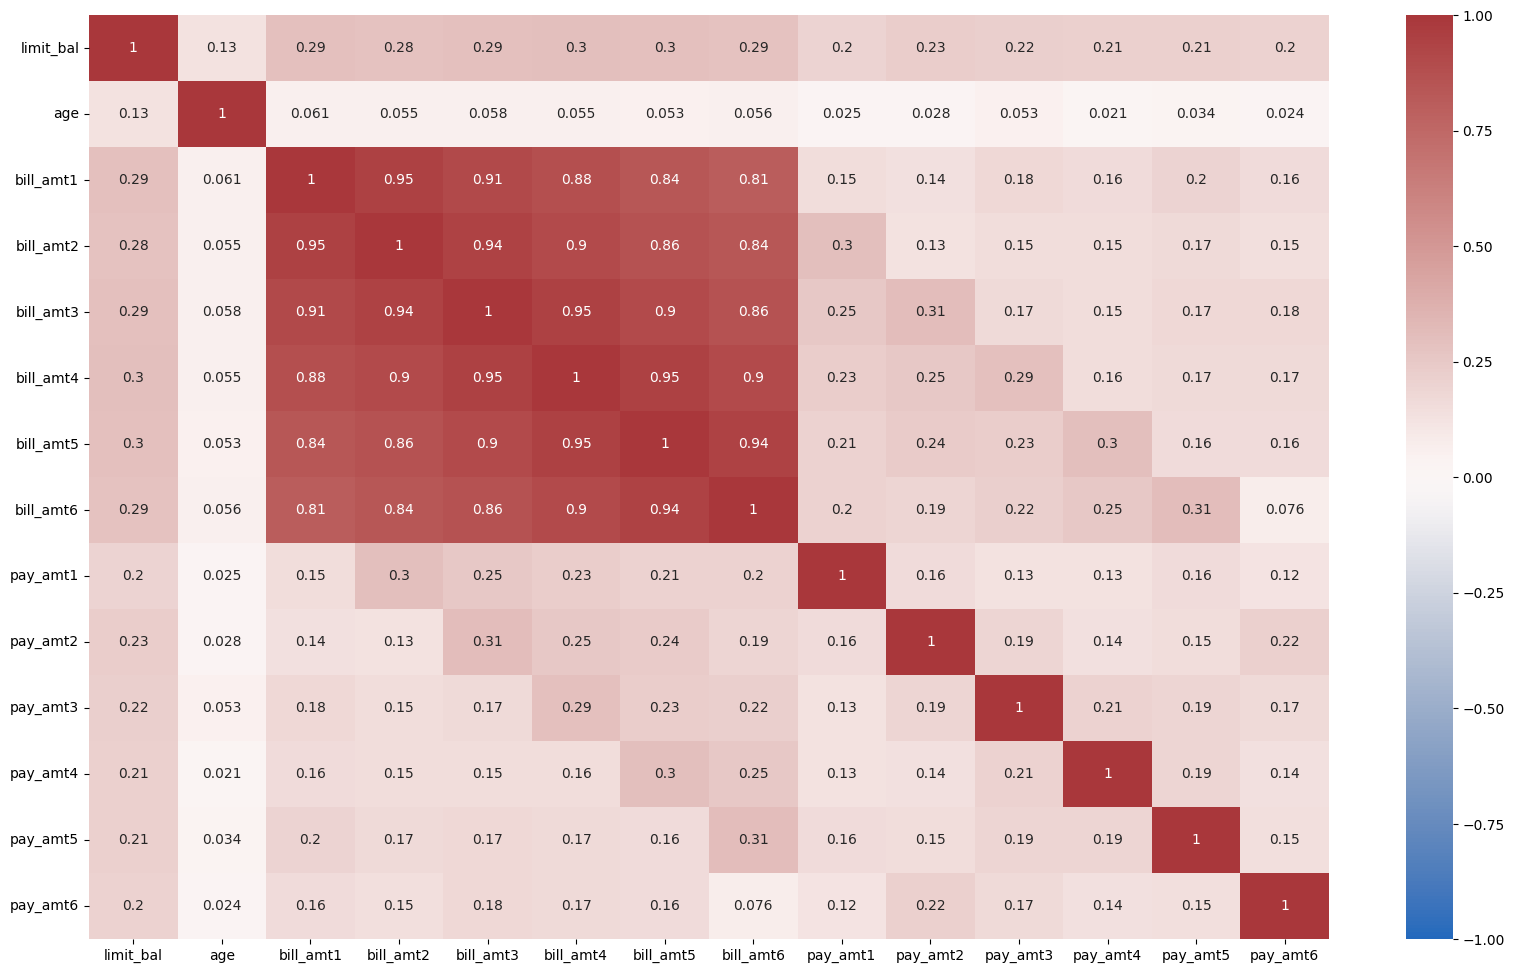

In [ ]:
corr = ds.corr(numeric_only=True)
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, cmap="vlag", vmin=-1, vmax=1)
plt.show()


We can see that all the bill amounts are highly correlated. The pay amounts, however, are not as strongly correlated. This is suggesting that, for this dataset, most customers' bill amounts are predictable month to month, but their payments are not consistent, which would be an interesting observation for default clients.

## Question 1 **(5 Points)**



**Customer Segmentation Using K-Means**  

**Steps to Follow:**  
1. Preprocess the data, if necessary. **(1 Point)**
2. Apply K-means **(2 Points)**
3. Interpret the segmentation. **(1 Point)**
4. Describe the average client in each cluster. **(1 Point)**


This segmentation may help in understanding different **customer profiles** and optimizing financial decision-making.

In [ ]:
# Import the required libraries
from sklearn.cluster import KMeans

Feature Extraction and Standardization


In [ ]:
numerical_features = ['limit_bal',	'age'	,'bill_amt1'	,'bill_amt2'	,'bill_amt3'	,'bill_amt4',	'bill_amt5'	,'bill_amt6'	,'pay_amt1'	,'pay_amt2',	'pay_amt3',	'pay_amt4',	'pay_amt5'	,'pay_amt6']
features = ds[numerical_features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Elbow Method and Silhouette Score for Optimal Clusters

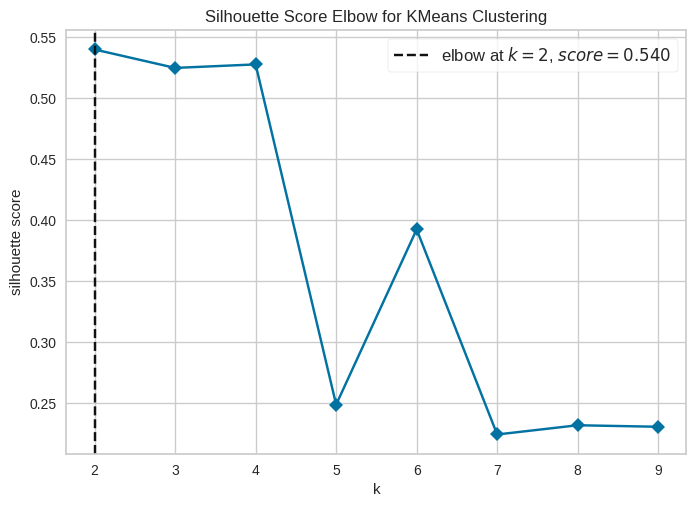

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='silhouette', timings=False #metric='silhouette' metric='distortion'
)

visualizer.fit(features_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


/usr/local/lib/python3.11/dist-packages/yellowbrick/utils/kneed.py:156: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.11/dist-packages/yellowbrick/cluster/elbow.py:374: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


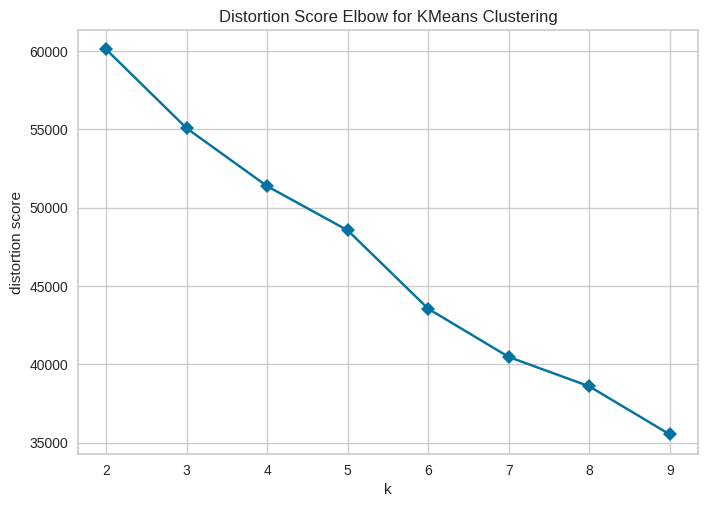

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
visualizer = KElbowVisualizer(
    kmeans, k=(2,10), metric='distortion', timings=False
)

visualizer.fit(features_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

From both the Silhouette and elbow Plots, there does not seem to be a particular cluster formations. K=2 shows the highest silhouette score and so we will go with it.

In [ ]:
# Apply KMeans with the chosen 5 clusters
kmeans = KMeans(n_clusters=2)
ds['kmeans_cluster'] = kmeans.fit_predict(features_scaled)

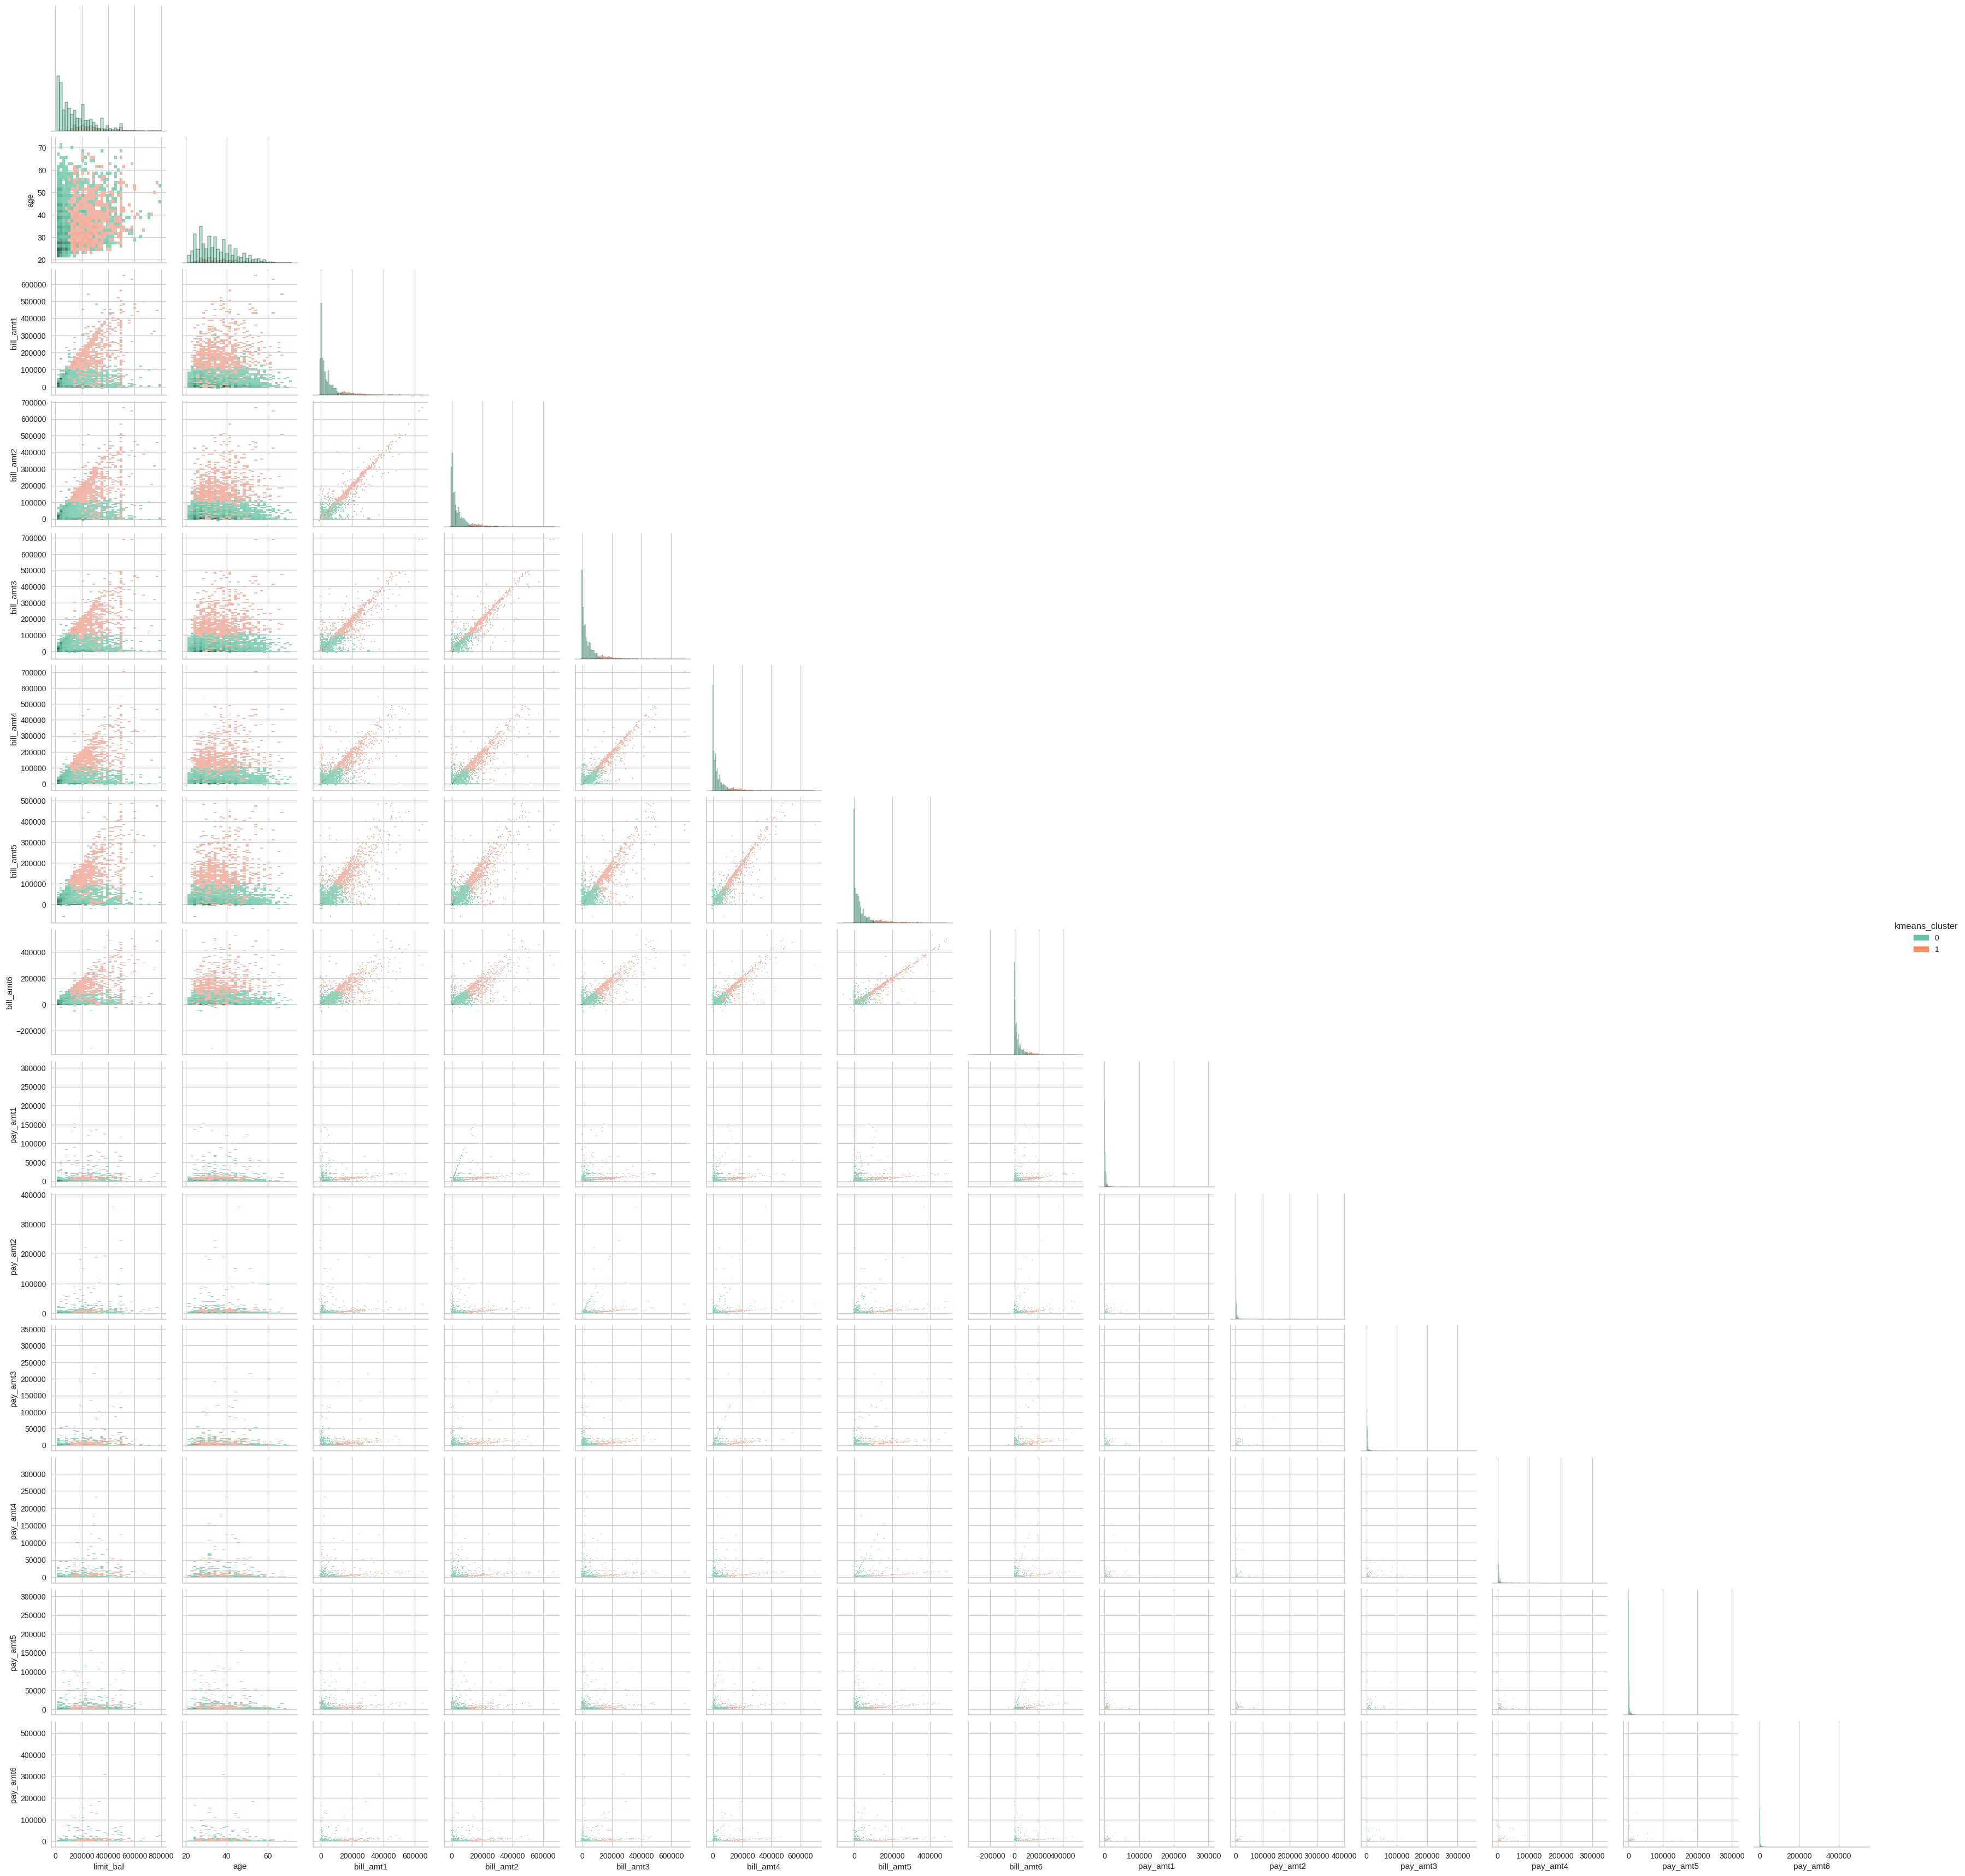

In [ ]:
sns.pairplot(ds, hue="kmeans_cluster", kind="hist", corner=True, palette="Set2")

K-means Centroid Summary

In [ ]:
centroids_unscaled = scaler.inverse_transform(kmeans.cluster_centers_)
df_centroids_unscaled = pd.DataFrame(centroids_unscaled, columns=numerical_features)
df_centroids_unscaled

,limit_bal,age,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6
0,270260.355030,36.784615,190029.842604,186796.145562,182686.485207,171608.433136,158930.179882,152658.867456,14866.515976,16544.630769,13970.216568,11451.694675,12551.523077,13661.298225
1,151837.051406,35.231232,29847.811445,27851.604268,25965.973424,23385.949758,21617.465567,20723.782347,4121.313676,3993.845199,3640.678177,3485.022890,3438.062076,4091.986227


The clusters seem to split according to high-spending (i.e., high bills, high payments, and high balance limit) vs. low-spending clients.

## Question 2 (5 Points)

**Customer Segmentation Using Hierarchical Clustering**  


1. Perform Hierarchical Clustering. **(1 Point)**
2. Draw and analyze the Dendrogram. **(1 Point)**
3. Determine the best hierarchical clustering Method for this dataset. **(1 Point)**
4. Compare the results with K-Means Clustering. Which one performed better? How did you reach that conclusion? **(1 Point)**
5. Would hierarchical clustering help in better identifying a client segment that could be extended a second line of credit?   **(1 Point)**


Hierarchical Clustering and Dendrogram Visualization

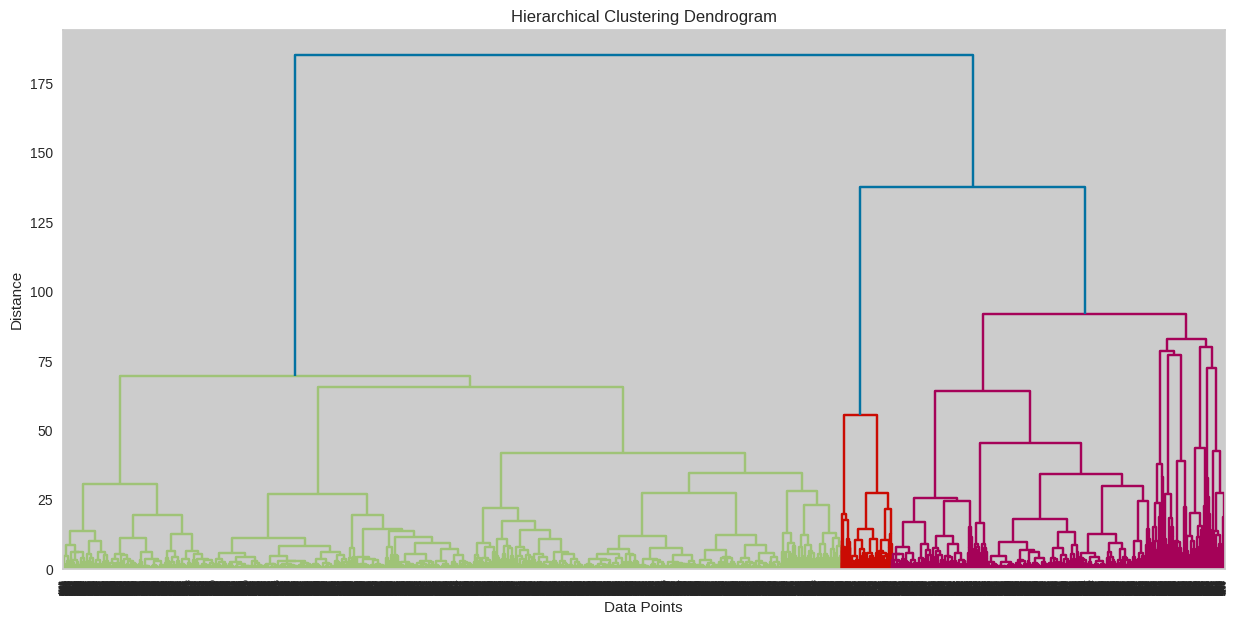

In [ ]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

# Perform hierarchical clustering using 'single' linkage method and 'euclidean' metric
Z = linkage(features_scaled, method='ward', metric='euclidean')

# Create the dendrogram to visualize the hierarchical clustering process
plt.figure(figsize=(15, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


There seems to be 2 or 3 clusters. One is smaller and may indicate some uniqueness.

Let's decide on the best number of clusters.

# cluster =  2 . score =  0.3404389685405276


<ipython-input-18-58d19bb052f5>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]], columns=['num_clusters', 'silhouette_score'])], ignore_index=True)


# cluster =  3 . score =  0.3230163671486016
# cluster =  4 . score =  0.2764123793826665
# cluster =  5 . score =  0.28079343218821795
# cluster =  6 . score =  0.2866567165636384
# cluster =  7 . score =  0.29093783308461385
# cluster =  8 . score =  0.29695031329156196
# cluster =  9 . score =  0.3006000293155
# cluster =  10 . score =  0.19486789489685755
# cluster =  11 . score =  0.15793610120536183
# cluster =  12 . score =  0.15817049710366632
# cluster =  13 . score =  0.16015186603894926
# cluster =  14 . score =  0.16710796140430903
# cluster =  15 . score =  0.1686676574696043
# cluster =  16 . score =  0.16977370253879825
# cluster =  17 . score =  0.16135446634878242
# cluster =  18 . score =  0.16250979416508707
# cluster =  19 . score =  0.16319914970332272


<Axes: xlabel='num_clusters'>

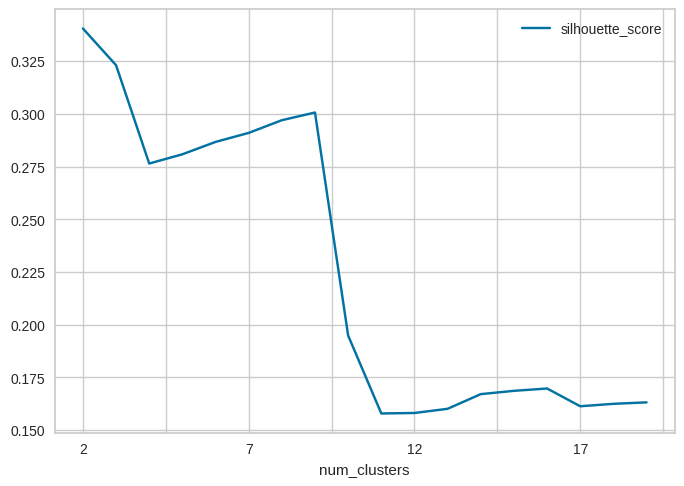

In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score

df_scores = pd.DataFrame(columns=['num_clusters', 'silhouette_score'])

for num_cluster in range(2, 20):
  labels = fcluster(Z, num_cluster, criterion='maxclust')
  score = silhouette_score(features_scaled, labels)

  print("# cluster = ", num_cluster, ". score = ", score)

  df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]], columns=['num_clusters', 'silhouette_score'])], ignore_index=True)

df_scores.plot.line(x='num_clusters', y='silhouette_score')

Seems like 2 clusters works best as well.

In [ ]:
ds['hierarchical_cluster'] = fcluster(Z, 2, criterion='maxclust')

In [ ]:
ds['hierarchical_cluster'].value_counts()

,count
hierarchical_cluster,
1,4021
2,1979


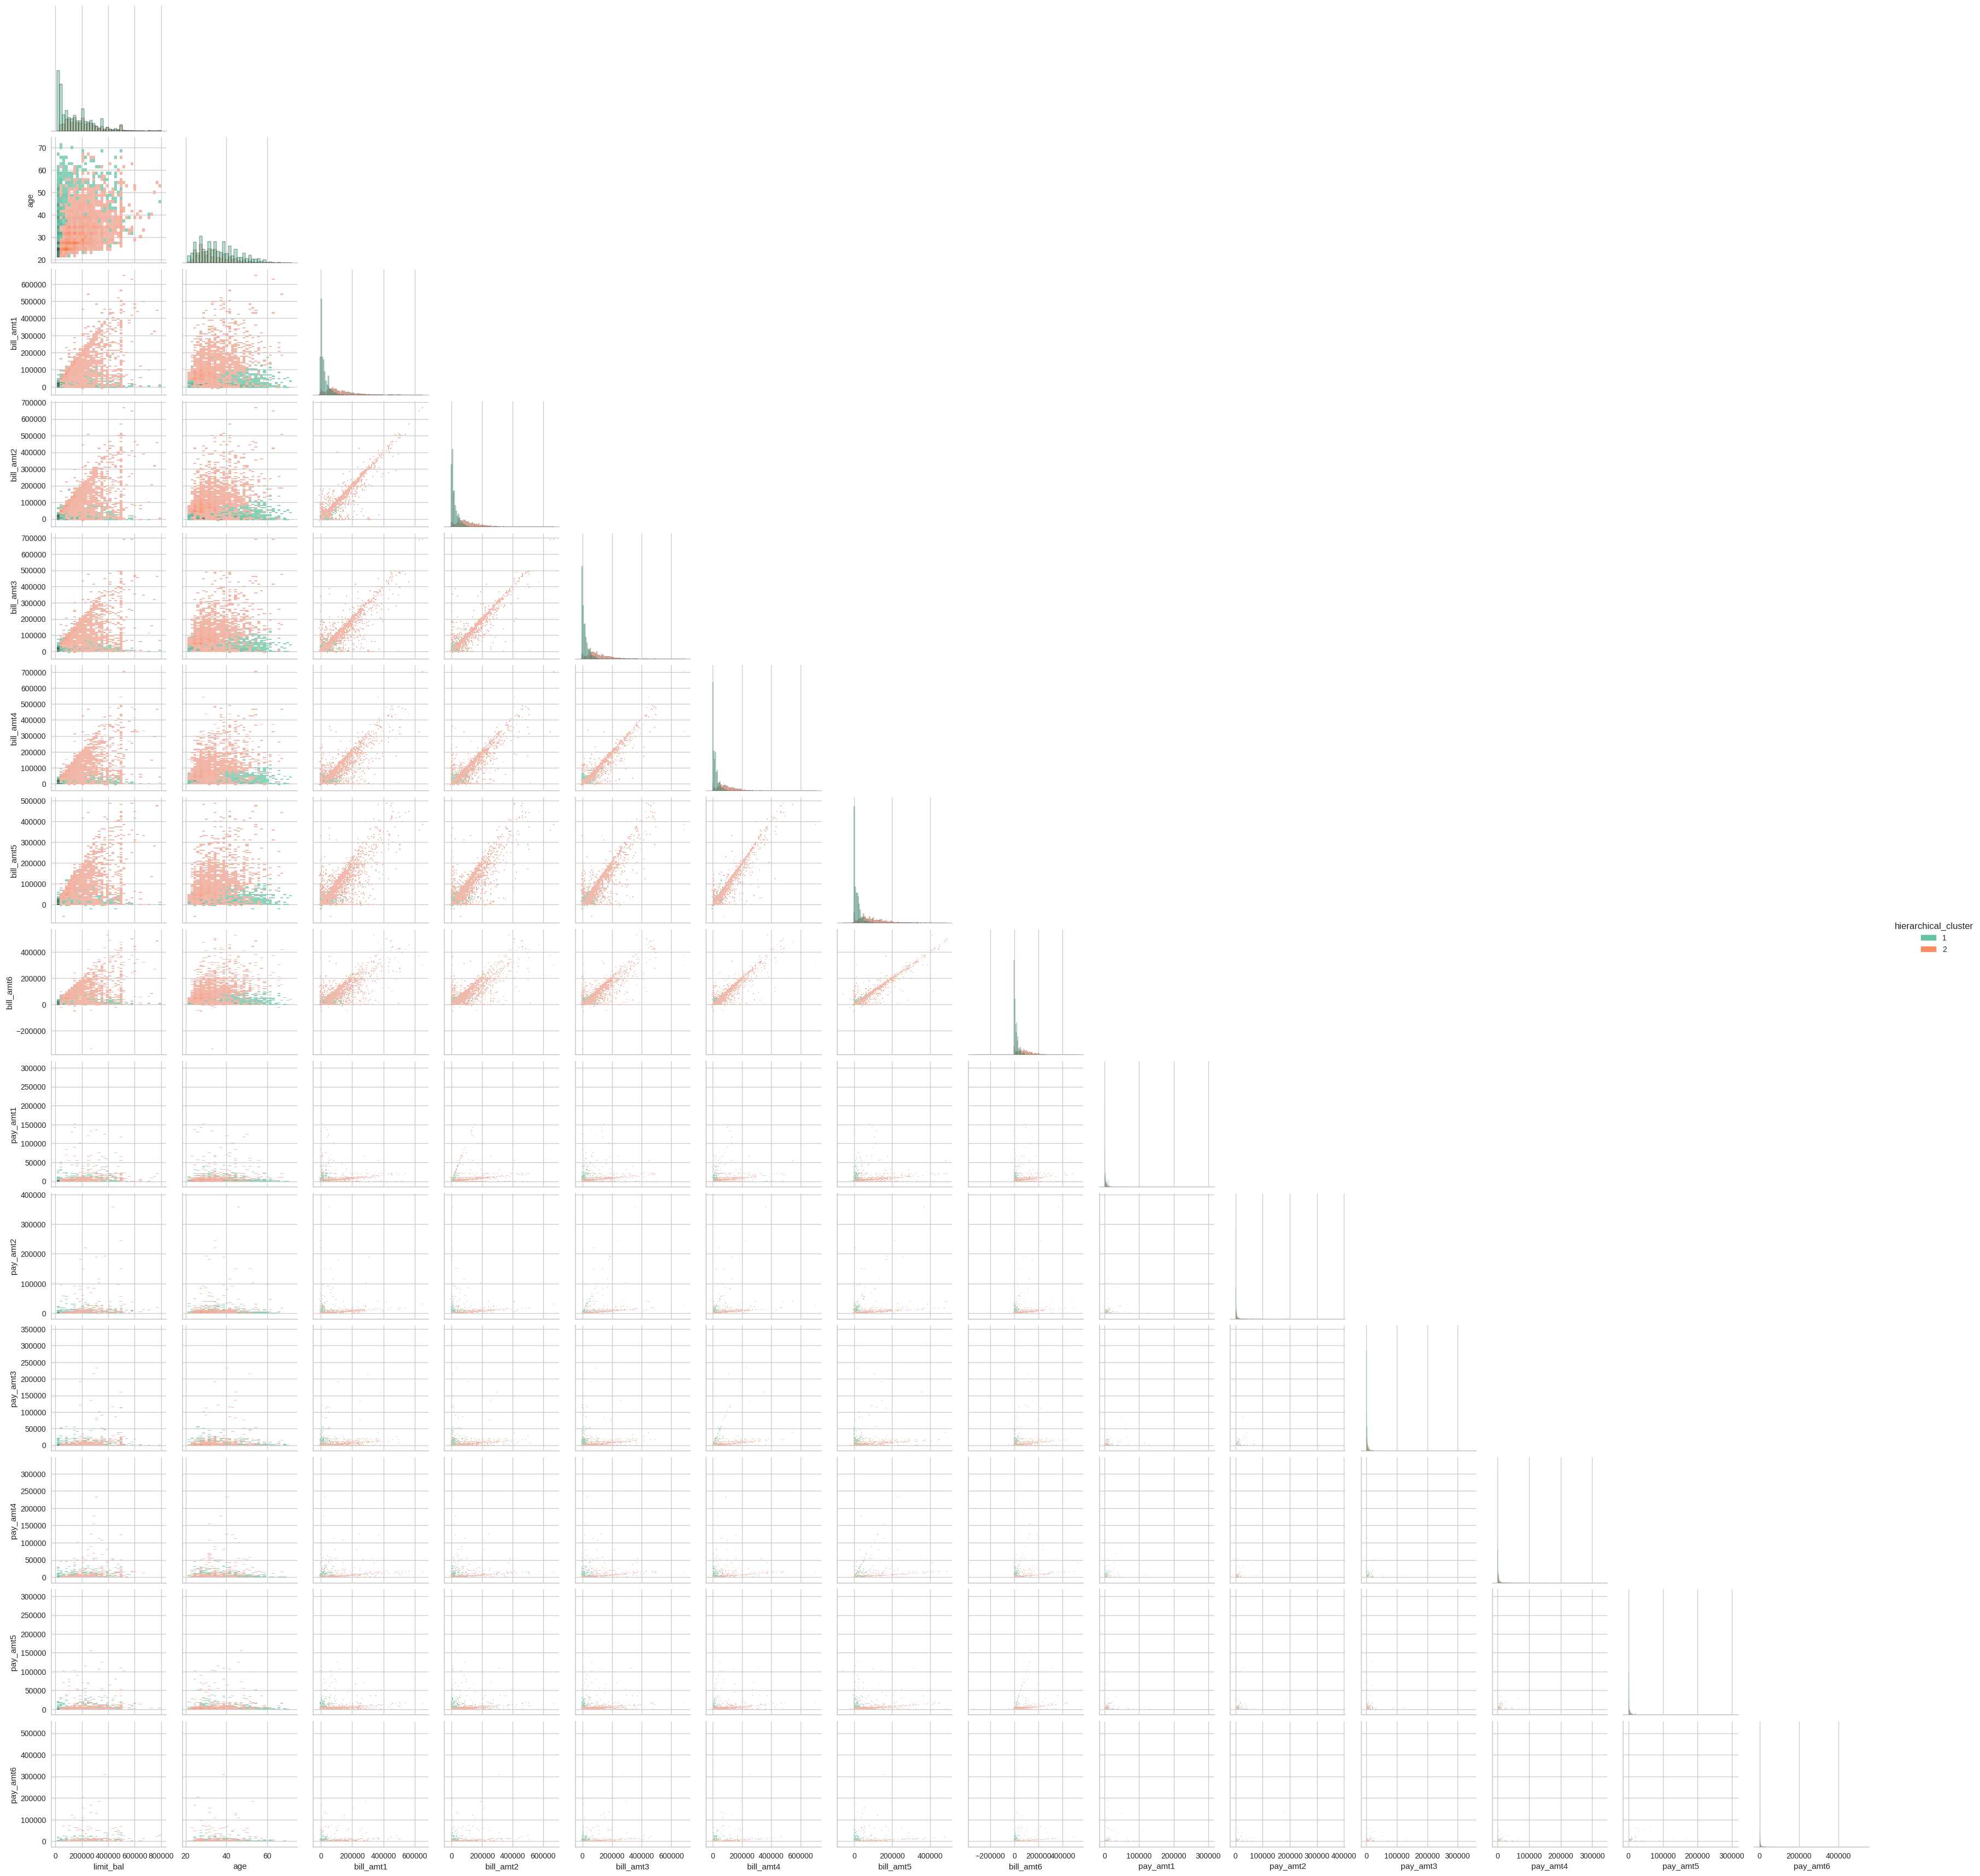

In [ ]:
sns.pairplot(ds.drop(["kmeans_cluster"], axis=1), hue="hierarchical_cluster", kind="hist", corner=True, palette="Set2")

Hierarchical Clustering Results Summary

In [ ]:
print(pd.crosstab(ds["hierarchical_cluster"], ds["kmeans_cluster"]))

kmeans_cluster           0    1
hierarchical_cluster           
1                     4017    4
2                     1147  832


When trying "Complete", cluster 1 is simply a few outliers that deviate from the general population of cluster 2. Even though the silhouette score is very high for 2 clusters, the clustering is obviously not very informative. This reinforces the notion that high silhouette may sometimes be deceiving.

When using  "ward", we get a clustering that is more reliant on bill amount than balance limit, suggesting a split that is solely based on bill amount without indicating whether the client has been extended a high credit limit.

Neither clustering result particularly indicates whether a client is worthy of second line of credit as both high-spending and low spending customers could default. After all, this dataset is about credit card defaulting clients.

## Question 3 **(5 Points)**

Perform linear dimensionality reduction on the dataset and retain the number of principal components needed to explain **75% of the variance**. **(3 Points)**

After performing dimensionality reduction:  
- Interpret the meaning of the first three principal components (PCs). **(1 Point)**
- Evaluate whether this reduction helped remove outliers. Provide evidence and explain your reasoning. **(1 Point)**

Let's perform PCA and plot the scree plot

In [ ]:
!pip install psynlig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 448.7/448.7 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.1

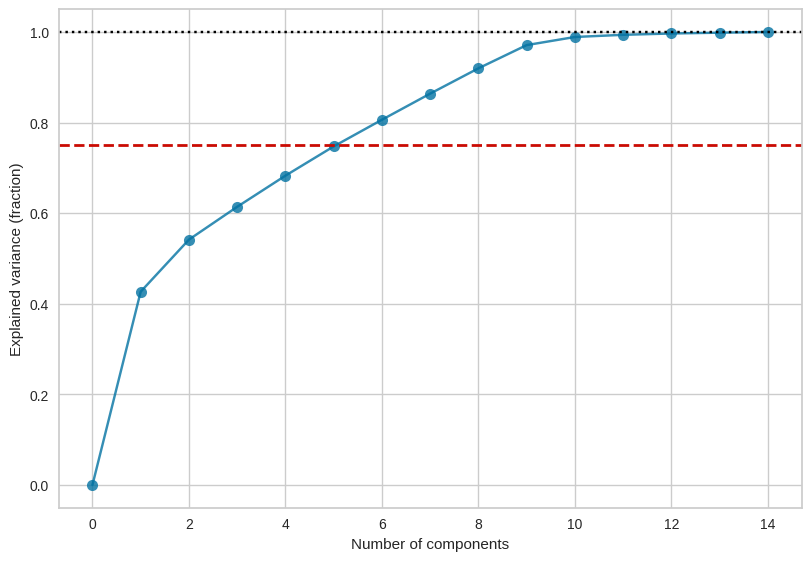

In [ ]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from psynlig import pca_explained_variance
import seaborn as sns

pca = PCA()
pca.fit_transform(features_scaled)

_, ax = pca_explained_variance(pca,  marker='o', markersize=8, alpha=0.8)

# Let's add a line at an explained variance of 75%
ax.axhline(y=0.75, color='r', linestyle='--', linewidth=2)

plt.show()

We need 5 component to get 75% variance.



In [ ]:
pca = PCA(5)
transformed_features_scaled = pca.fit_transform(features_scaled)
transformed_features_scaled_df = pd.DataFrame(transformed_features_scaled, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])


In [ ]:
transformed_features_scaled_df

,PC1,PC2,PC3,PC4,PC5
0,-1.536009,-0.587364,-1.184523,0.071622,-0.130382
1,1.875840,-1.170361,-0.945544,-0.067461,-0.083609
2,0.576169,-0.934898,-0.444195,0.083038,-0.201863
3,-1.132014,0.224938,1.437466,0.019475,-0.099995
4,-0.573828,-0.844414,0.021196,-0.038291,-0.104882
...,...,...,...,...,...
5995,-1.556996,0.376251,-0.396776,-0.074676,-0.020908
5996,1.984144,0.389898,-0.306436,-0.542603,0.117375
5997,-0.162760,-0.844038,-0.852413,0.117998,-0.179715
5998,-1.912683,-0.495032,-0.774516,-0.062677,-0.042356


Let's see how the 3 top PCs map to the original features

(<Figure size 800x550 with 2 Axes>, <Axes: >)

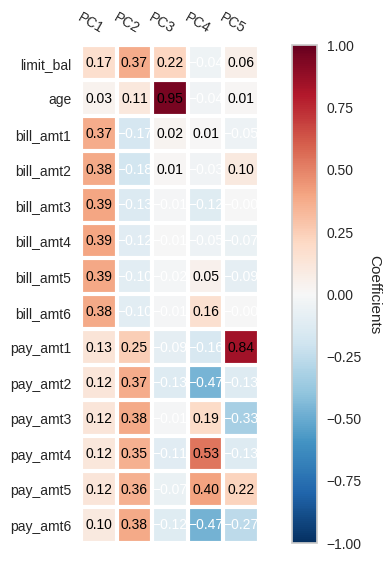

In [ ]:
from psynlig import pca_loadings_map

kwargs = {
    'heatmap': {
        'vmin': -1,
        'vmax': 1,
        'cmap': 'RdBu_r',
    },
    'text': {
        'fontsize': 'small',
    },
}


# Plot the value of the coefficients:
pca_loadings_map(
    pca,
    numerical_features,
    textcolors=['white', 'black'],
    **kwargs
)

The interpretation would be the following:
- PC1 mostly represents vartiations in monthly bill amounts for different clients. Thus, represernting 6 original features.
- PC2 mostly represents vartiations in monthly payment amounts for different clients. Notice that moving a long this axis, we get clients whose bill amounts are higher but who somehat pay less. So, a clustering along this PC may indicate a good split for the purposes of extending credit.
- PC3 mostly represents vartiations in age for different clients.


<Axes: >

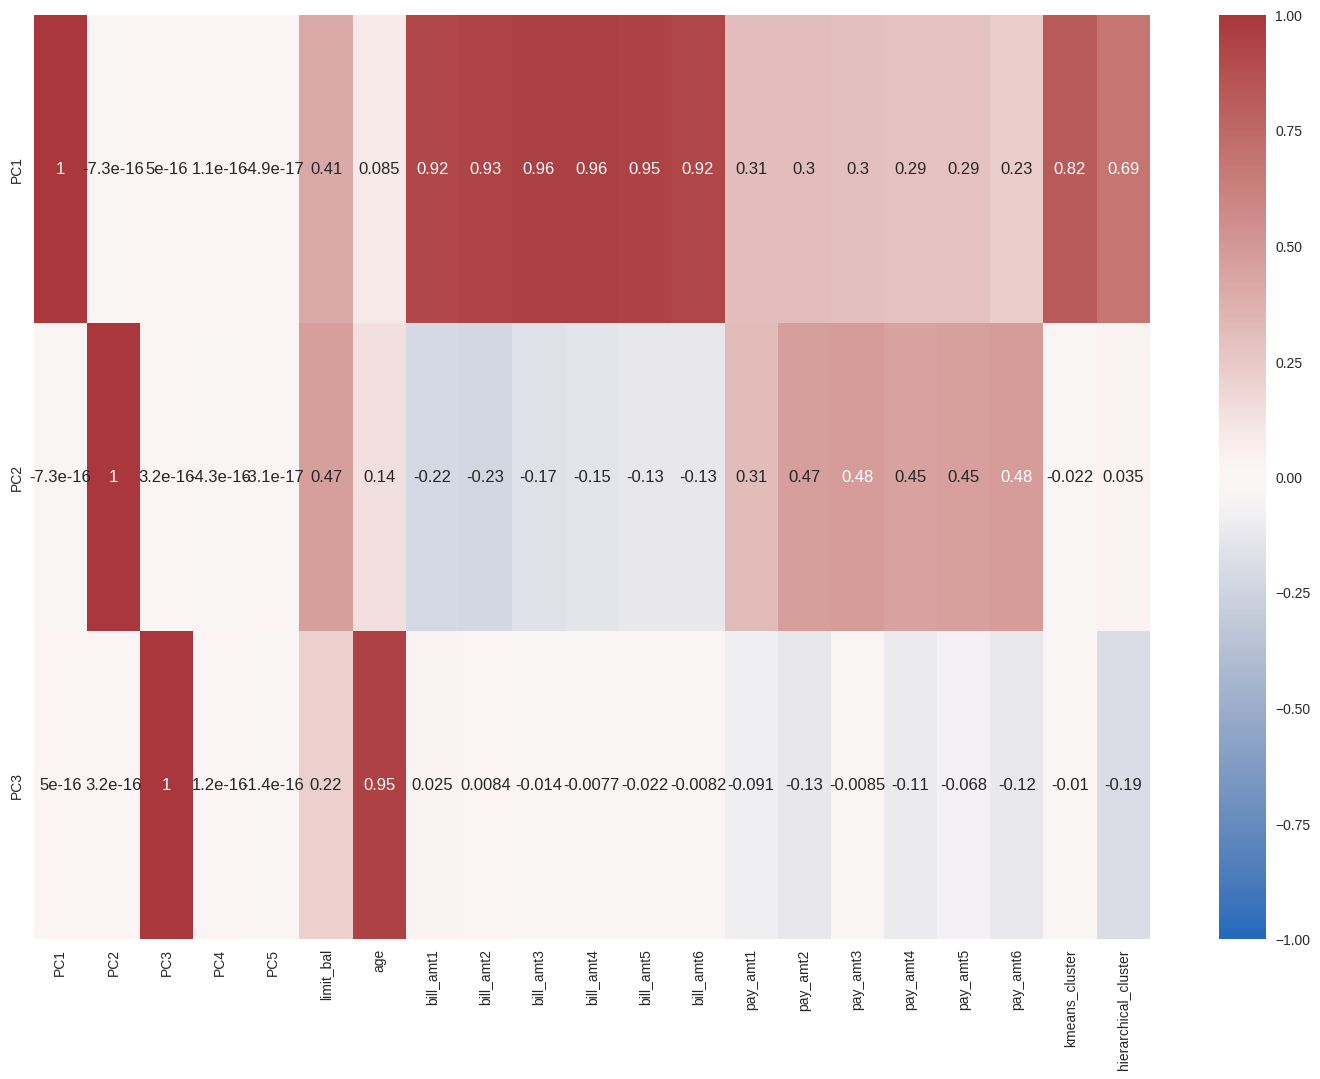

In [ ]:
  corr = pd.concat([transformed_features_scaled_df, ds.reset_index(drop=True)], axis=1).corr(numeric_only=True)
  corr.drop(["PC1", "PC2", "PC3"], axis=1)
  corr = corr.loc[["PC1", "PC2", "PC3"], :]

  plt.figure(figsize=(18, 12))
  sns.heatmap(corr, annot=True, cmap="vlag", vmin=-1, vmax=1)

Now, let's do the clustering

# cluster =  2 . score =  0.4195052652905109


<ipython-input-30-457fb6458d02>:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]], columns=['num_clusters', 'silhouette_score'])], ignore_index=True)


# cluster =  3 . score =  0.397810223873191
# cluster =  4 . score =  0.3710933036440754
# cluster =  5 . score =  0.38013581864056245
# cluster =  6 . score =  0.2660719721465768
# cluster =  7 . score =  0.2715047354152551
# cluster =  8 . score =  0.26785899531623314
# cluster =  9 . score =  0.25424422856678175
# cluster =  10 . score =  0.26737182554168065
# cluster =  11 . score =  0.2698898127079469
# cluster =  12 . score =  0.27357019343673483
# cluster =  13 . score =  0.19669148971756653
# cluster =  14 . score =  0.19906807499236295
# cluster =  15 . score =  0.20510893738425703
# cluster =  16 . score =  0.20586157104652336
# cluster =  17 . score =  0.20647189292630355
# cluster =  18 . score =  0.2096493502162287
# cluster =  19 . score =  0.2048320670317553


<Axes: xlabel='num_clusters'>

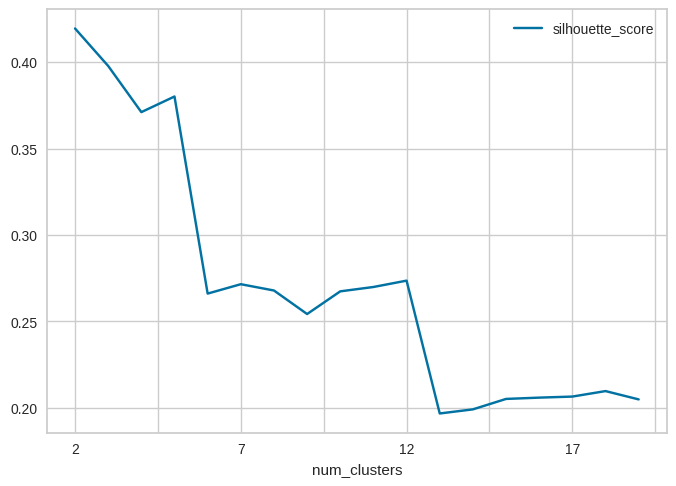

In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score

Z = linkage(transformed_features_scaled, method='ward', metric='euclidean')

df_scores = pd.DataFrame(columns=['num_clusters', 'silhouette_score'])

for num_cluster in range(2, 20):
  labels = fcluster(Z, num_cluster, criterion='maxclust')
  score = silhouette_score(transformed_features_scaled, labels)

  print("# cluster = ", num_cluster, ". score = ", score)

  df_scores = pd.concat([df_scores, pd.DataFrame([[num_cluster, score]], columns=['num_clusters', 'silhouette_score'])], ignore_index=True)

df_scores.plot.line(x='num_clusters', y='silhouette_score')

2 clusters are best. Notice that the silhouette score is now much higher after the dimensionality reduction.

In [ ]:
inverse_features_scaled = pca.inverse_transform(transformed_features_scaled) # project back to original space.
inverse_features = scaler.inverse_transform(inverse_features_scaled) # unscale
inverse_features_df = pd.DataFrame(inverse_features, columns=numerical_features)

inverse_features_df["hierarchical_pca_cluster"] = fcluster(Z, 2, criterion='maxclust')

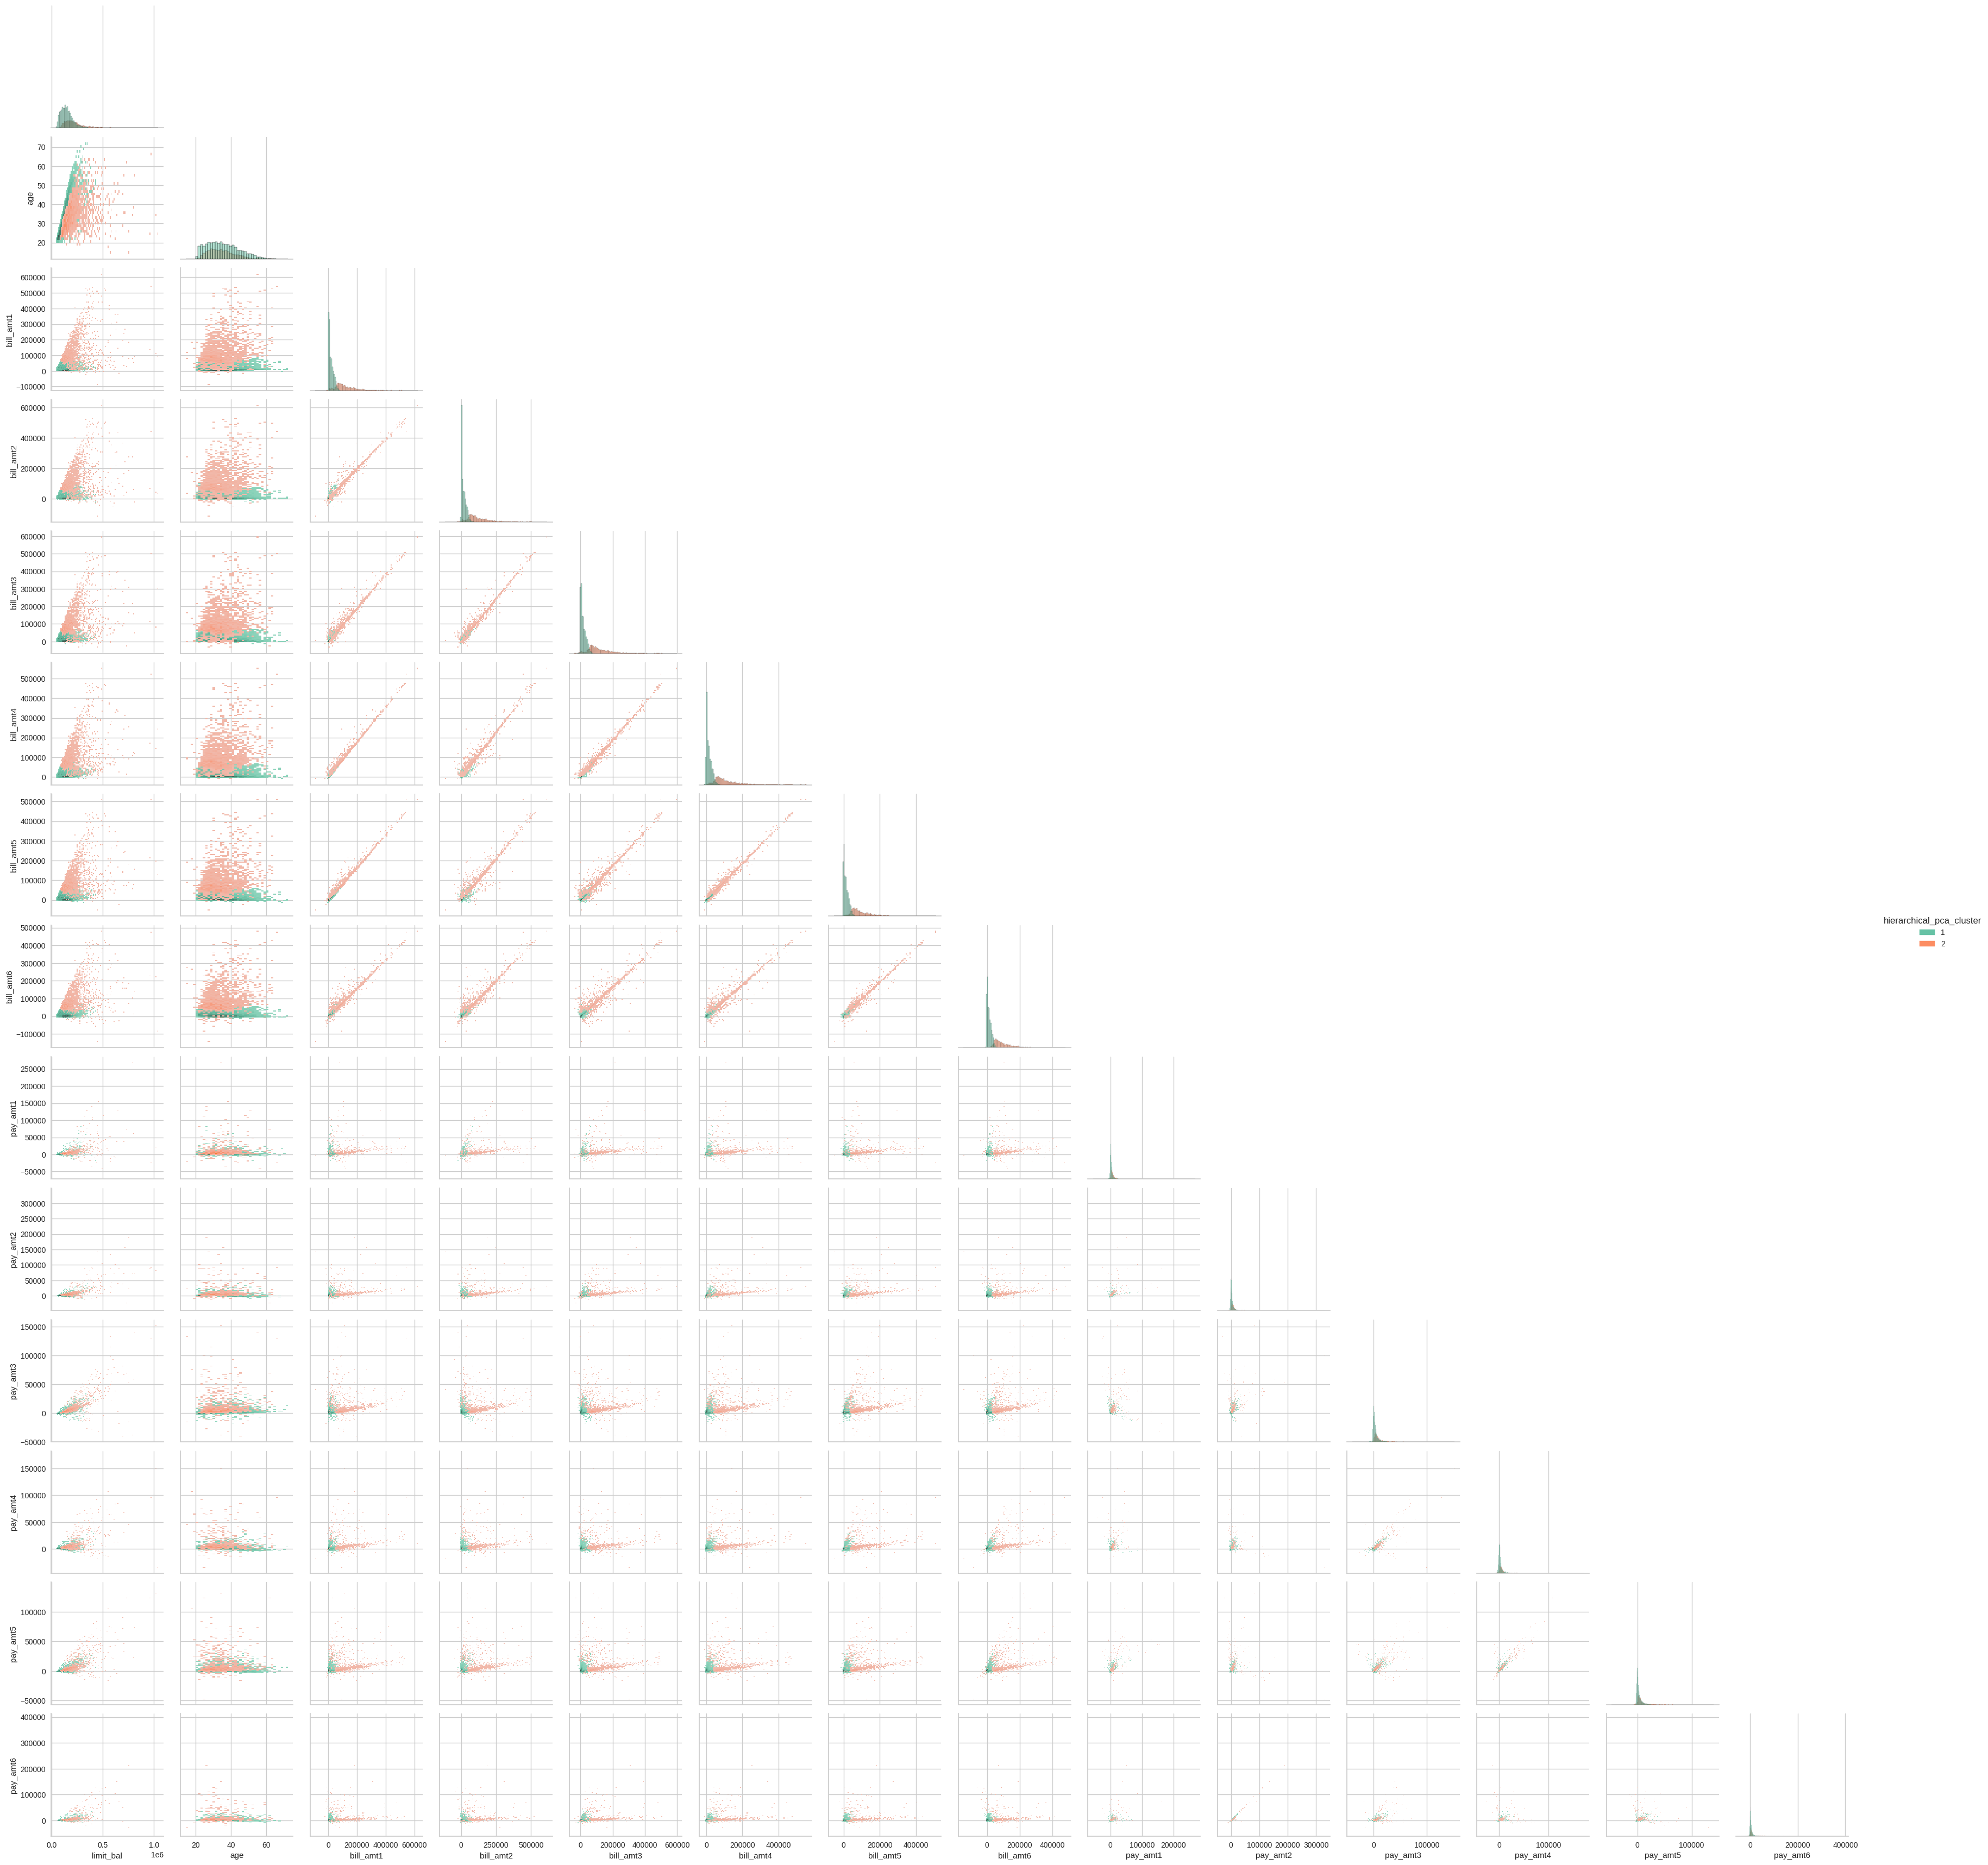

In [ ]:
sns.pairplot(inverse_features_df, hue="hierarchical_pca_cluster", kind="hist", corner=True, palette="Set2")

Notice how the histograms in the pair plots are clearer. For example, for the pay amount columns, the maximum value has shrunk from ~30k to ~10k, indicating that some outliers have been removed.